# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?
    
    
# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?


In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

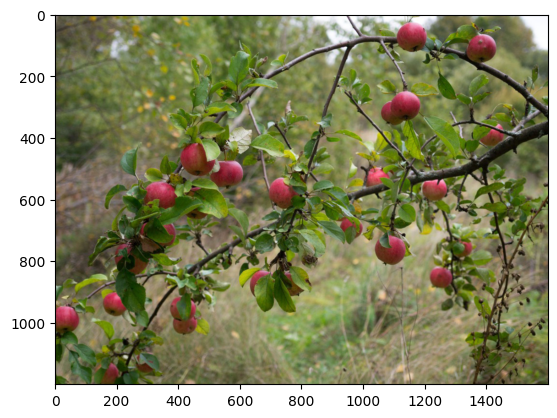

In [2]:
path = "appletree.jpg"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

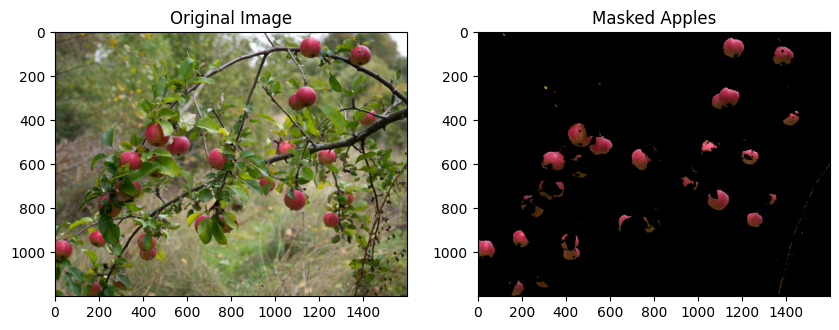

In [15]:
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 160, 50])
upper_red1 = np.array([21, 255, 255])
lower_red2 = np.array([140, 100, 50])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

result = cv2.bitwise_and(image, image, mask=mask)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Masked Apples")
plt.imshow(result)
plt.show()

There are 30 apples in the image!


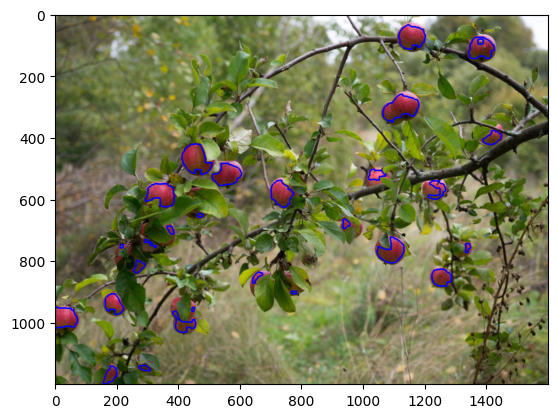

In [21]:
# Use the mask that you generated from the HSV color ranges
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

# Apply erosion and dilation to clean the mask further
mask = cv2.dilate(mask, None, iterations=3)
mask = cv2.erode(mask, None, iterations=3)
mask = cv2.erode(mask, None, iterations=3)
mask = cv2.dilate(mask, None, iterations=3)

# Find contours in the mask
cnts = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Copy the original image to draw contours on it
output = image.copy()

# Draw each contour on the output image with a 3px thick red outline
for c in cnts:
    cv2.drawContours(output, [c], -1, (0, 0, 255), 3)

# Display the output image with contours
plt.imshow(output)

# Print the number of apples detected
print('There are '+str(len(cnts))+' apples in the image!')

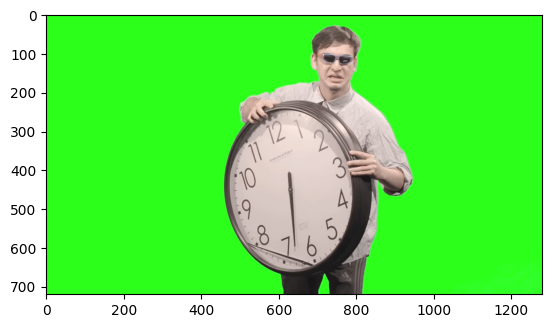

In [22]:
path = "ittsp.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)



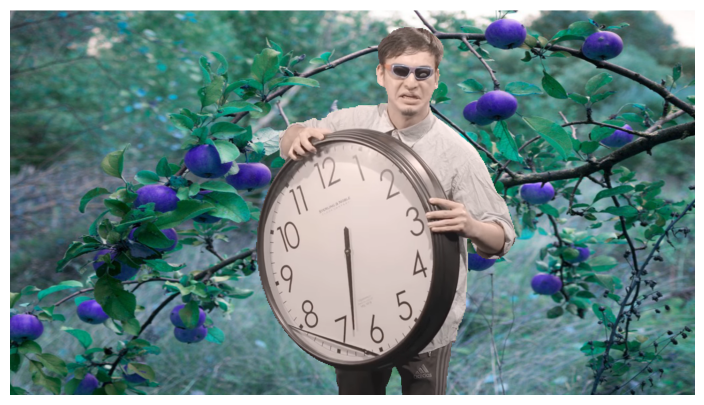

In [27]:
lower_green = np.array([35, 40, 40])  # Adjust values if needed
upper_green = np.array([85, 255, 255])
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a mask for the green background
mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Improve the mask by using erode and dilate to clean up the edges
mask = cv2.erode(mask, None, iterations=2)  # Erode the green edges
mask = cv2.dilate(mask, None, iterations=2)  # Dilate the mask to get smooth edges

# Invert the mask to get the subject (non-green areas)
mask_inv = cv2.bitwise_not(mask)

# Load a new background image
background = cv2.imread('appletree.jpg')
background = cv2.resize(background, (image.shape[1], image.shape[0]))

# Extract the subject from the original image using the inverted mask
subject = cv2.bitwise_and(image, image, mask=mask_inv)

# Extract the background from the new background image using the original mask
new_background = cv2.bitwise_and(background, background, mask=mask)

# Combine the subject with the new background
final_image = cv2.add(subject, new_background)

# Display the result
plt.figure(figsize=(10,5))
plt.imshow(final_image)
plt.axis('off')
plt.show()